In [6]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import START,END,StateGraph
from langgraph.graph.message import add_messages

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
groq_api = ''
langsmith_api = ''

In [22]:
llm = ChatGroq(groq_api_key = groq_api,model_name = 'gemma2-9b-it')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001EE050ED610>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001EE0604A750>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [29]:
class State(TypedDict):
    messages: Annotated[list,add_messages]
graph_builder = StateGraph(State)

In [30]:
def chatbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

In [31]:
graph_builder.add_node('chatbot',chatbot)

In [32]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [33]:
graph = graph_builder.compile()

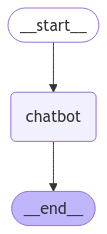

In [34]:
from IPython.display import display,Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [35]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)
            

In [37]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    stream_graph_updates(user_input)

User:  hello


Assistant: Hello! 👋 How can I help you today?



User:  what is machine learning


Assistant: Machine learning is a type of artificial intelligence (AI) that allows computers to learn from data without being explicitly programmed. 

Imagine teaching a child to identify a cat. You wouldn't write down a list of all the features that make a cat a cat (furry, four legs, pointy ears, etc.). Instead, you'd show them many pictures of cats and say "This is a cat." Over time, the child would learn to recognize the patterns and features that define a cat.

Machine learning works in a similar way. It uses algorithms to analyze large datasets and identify patterns. These patterns can then be used to make predictions or decisions.

**Here's a breakdown:**

* **Data:** Machine learning algorithms rely on data to learn. The more data they have, the better they become at identifying patterns.
* **Algorithms:** These are sets of rules that the computer uses to analyze the data. There are many different types of machine learning algorithms, each suited to different tasks.
* **Training

User:  q


Goodbye!
